<a href="https://colab.research.google.com/github/MadalinaStefan/OCR_comparison/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STANDARD**

In [1]:
!pip install keras_ocr
!pip install pybind11
!pip3 install fastwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp310-cp310-linux_x86_64.whl size=827756 sha256=229600cf1a07441e4f9e5bcd0f72730d4367b0f728500dca8c1eed38e4b4a668
  Stored in directory: /root/.cache/pip/wheels/99/b5/22/f6edc9a914bf3b54ebc55e258e2f9aa2297908d85799de228f
Successfully built fastwer


In [2]:
from google.colab import drive
import os
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd
import fastwer

drive.mount('/content/drive')
pipeline = keras_ocr.pipeline.Pipeline()

Mounted at /content/drive
Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [3]:
images_folder = '/content/drive/MyDrive/dataset_immagini'
csv_folder = '/content/drive/MyDrive/golden_text'

images = []
labels = []
true_texts = []

for folder_class in os.listdir(images_folder):
  path = csv_folder + '/' + folder_class + '.csv'
  texts = pd.read_csv(path).values

  #for value in df.values:
  #  true_text.append(value[0])

  for file in os.listdir(images_folder + '/' + folder_class):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
      images.append(images_folder + '/' + folder_class + '/' + file)
      labels.append(folder_class)
      index = int(file.split('.')[0])
      true_texts.append(texts[index][0])


In [4]:
import cv2
import numpy as np

In [5]:
images_path = images
images = [keras_ocr.tools.read(img) for img in images]
images = np.array(images)
true_texts = np.array(true_texts)

<ipython-input-5-15ab73f2a8d5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [6]:
def visualize_images(images, grey=False):
  f, grid_plot = plt.subplots(4, 5, figsize=(20,40))

  if grey:
    grid_plot[0,0].imshow(images[0], cmap='Greys')
    grid_plot[0,1].imshow(images[1], cmap='Greys')
    grid_plot[0,2].imshow(images[2], cmap='Greys')
    grid_plot[0,3].imshow(images[3], cmap='Greys')
    grid_plot[0,4].imshow(images[4], cmap='Greys')
    grid_plot[1,0].imshow(images[5], cmap='Greys')
    grid_plot[1,1].imshow(images[6], cmap='Greys')
    grid_plot[1,2].imshow(images[7], cmap='Greys')
    grid_plot[1,3].imshow(images[8], cmap='Greys')
    grid_plot[1,4].imshow(images[9], cmap='Greys')
    grid_plot[2,0].imshow(images[10], cmap='Greys')
    grid_plot[2,1].imshow(images[11], cmap='Greys')
    grid_plot[2,2].imshow(images[12], cmap='Greys')
    grid_plot[2,3].imshow(images[13], cmap='Greys')
    grid_plot[2,4].imshow(images[14], cmap='Greys')
    grid_plot[3,0].imshow(images[15], cmap='Greys')
    grid_plot[3,1].imshow(images[16], cmap='Greys')
    grid_plot[3,2].imshow(images[17], cmap='Greys')
    grid_plot[3,3].imshow(images[18], cmap='Greys')
    grid_plot[3,4].imshow(images[19], cmap='Greys')
  else:
    grid_plot[0,0].imshow(images[0])
    grid_plot[0,1].imshow(images[1])
    grid_plot[0,2].imshow(images[2])
    grid_plot[0,3].imshow(images[3])
    grid_plot[0,4].imshow(images[4])
    grid_plot[1,0].imshow(images[5])
    grid_plot[1,1].imshow(images[6])
    grid_plot[1,2].imshow(images[7])
    grid_plot[1,3].imshow(images[8])
    grid_plot[1,4].imshow(images[9])
    grid_plot[2,0].imshow(images[10])
    grid_plot[2,1].imshow(images[11])
    grid_plot[2,2].imshow(images[12])
    grid_plot[2,3].imshow(images[13])
    grid_plot[2,4].imshow(images[14])
    grid_plot[3,0].imshow(images[15])
    grid_plot[3,1].imshow(images[16])
    grid_plot[3,2].imshow(images[17])
    grid_plot[3,3].imshow(images[18])
    grid_plot[3,4].imshow(images[19])


In [7]:
def resize_image(img, scale_percent=25):
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)

  return cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)

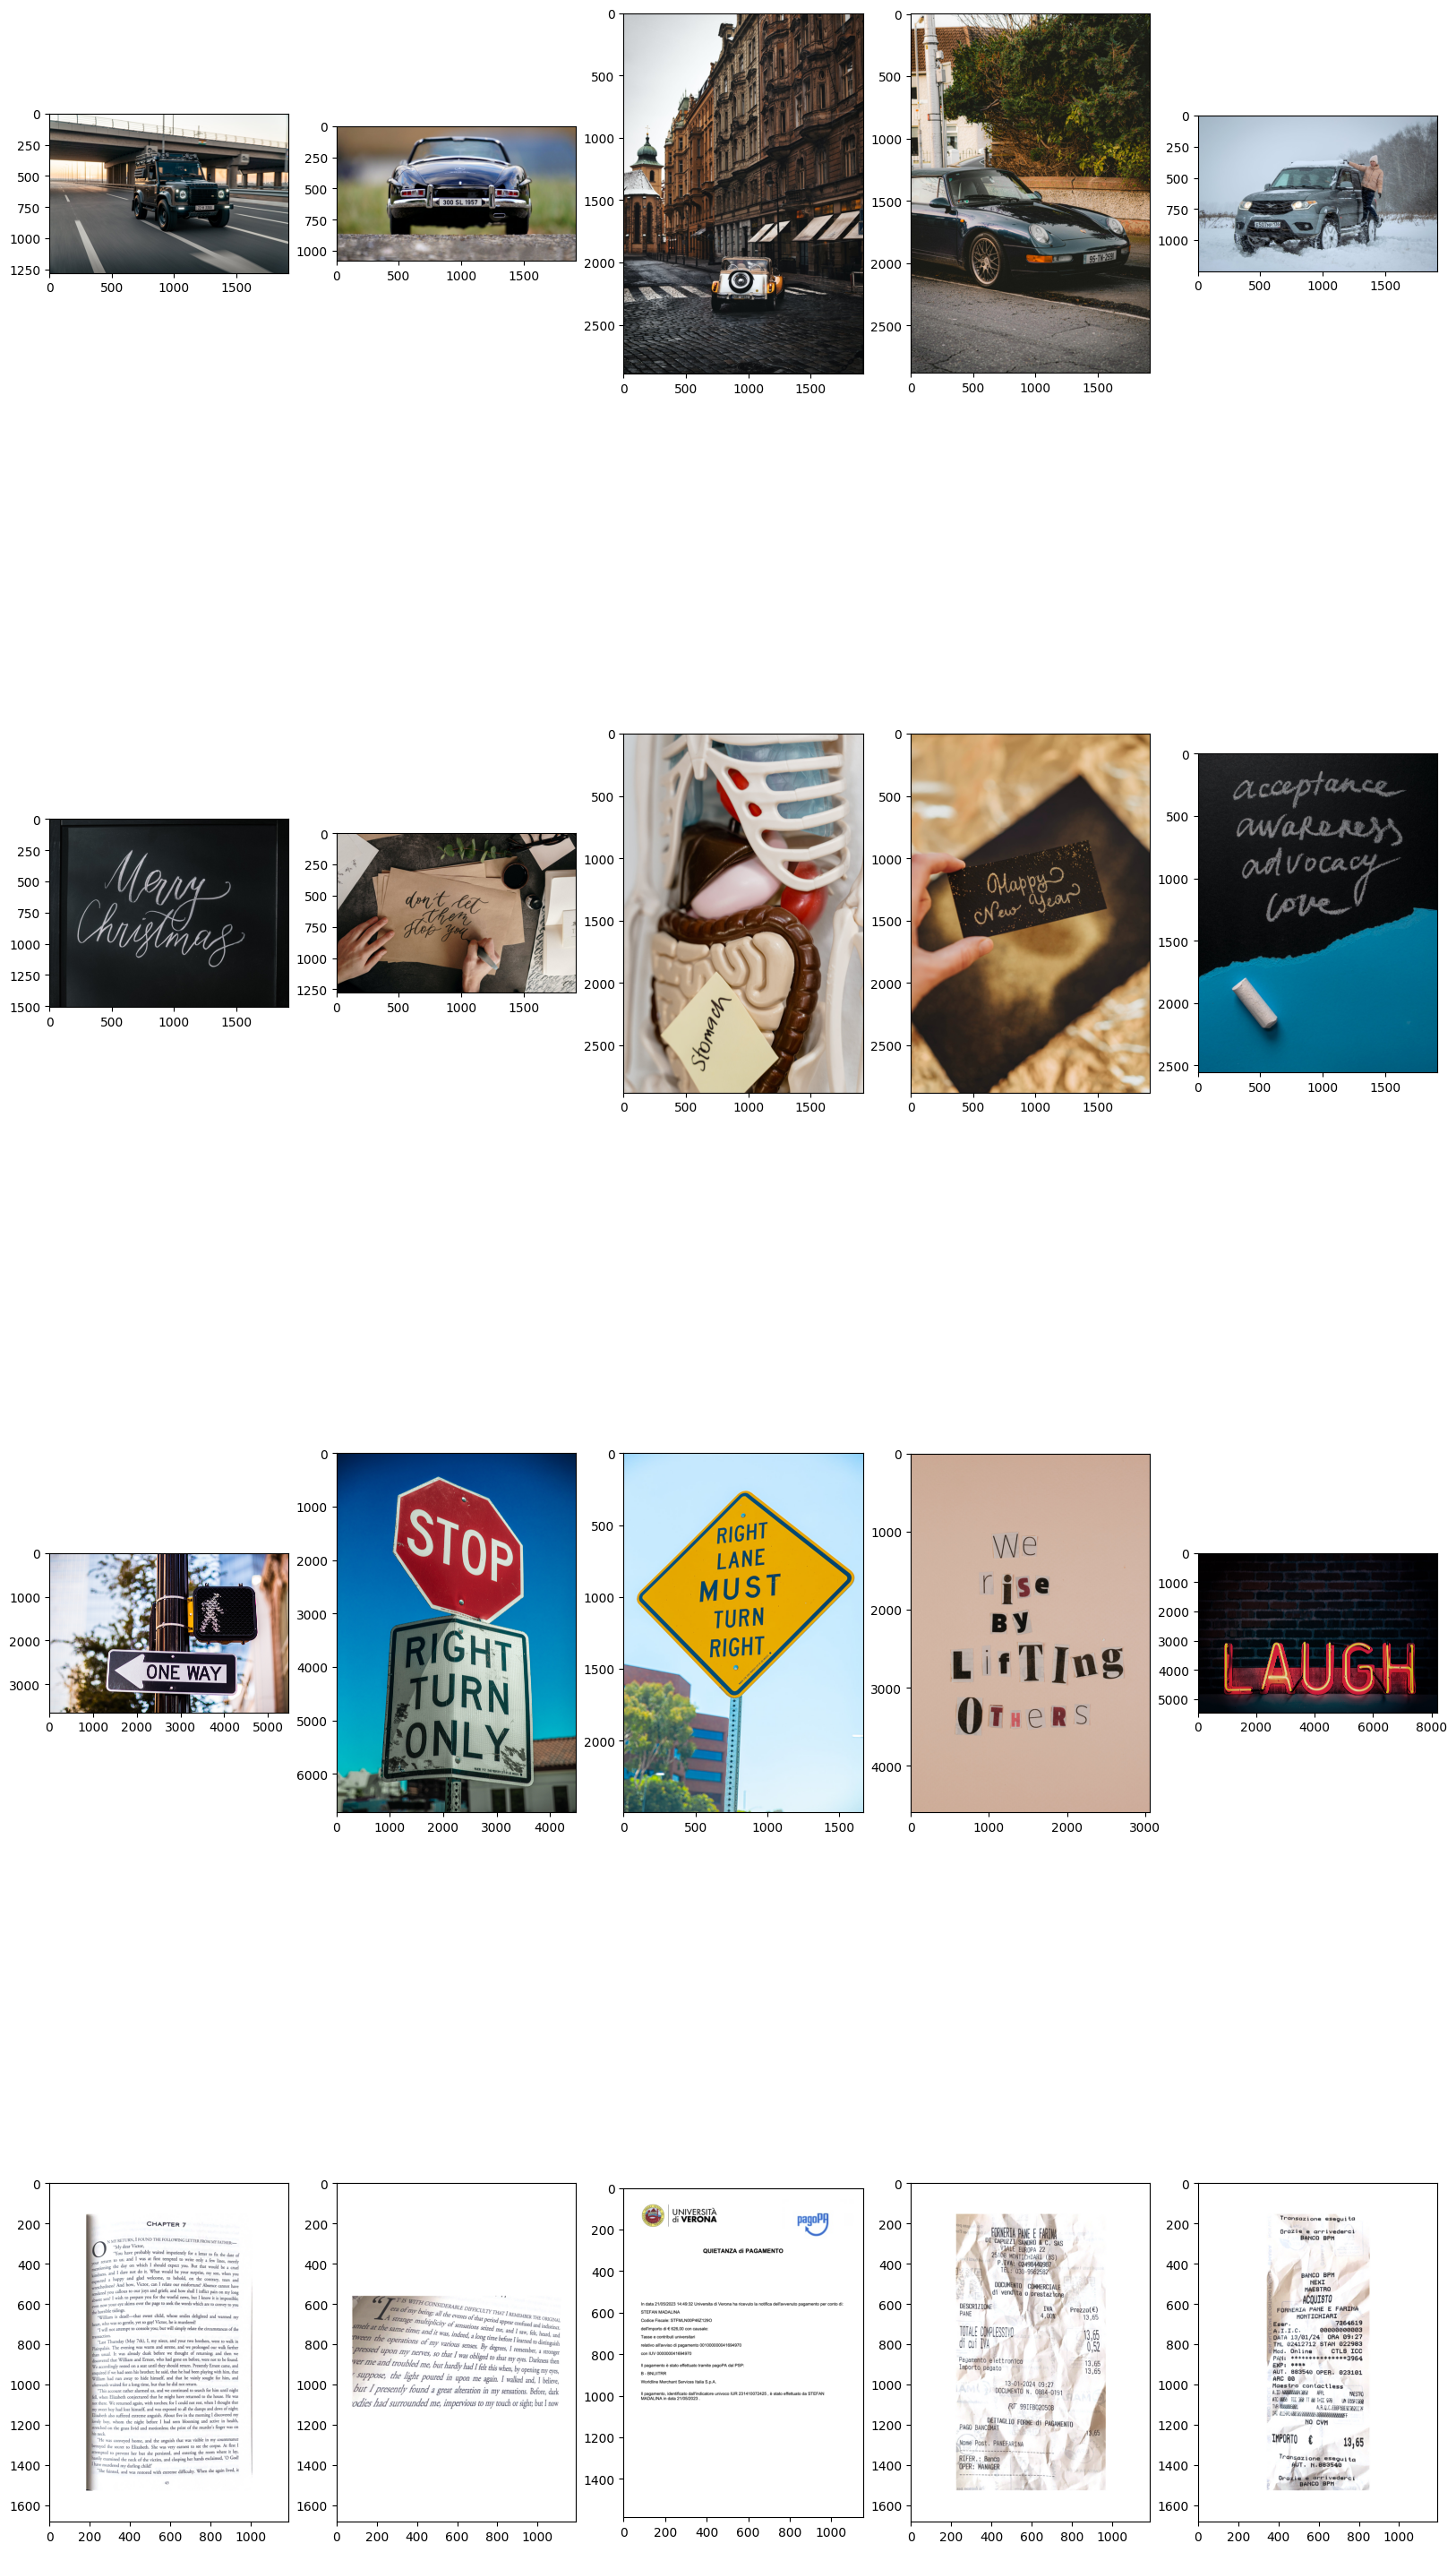

In [8]:
import cv2
import numpy as np

def image_transform(images, t_type, scale = False):
  transform_images = []
  images_scaled = []

  if scale:
    for img in images:
      images_scaled.append(resize_image(img, 25))
  else:
    images_scaled = images

  for img in images:
    if t_type == 'blur':
      #image = cv2.GaussianBlur(img, (7, 7), 0)
      image = cv2.blur(img, (7, 7))
    elif t_type == 'rotation':
      image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    else:
      #weights = [0.2989, 0.5870, 0.1140]
      #image = np.dot(img[..., :3], weights)
      image =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #image= cv2.imread(img, cv2.IMREAD_GRAYSCALE)


    transform_images.append(image)

  return transform_images

t_images = image_transform(images, 'gray') #rotation, blur o gray

visualize_images(images, False) #true gray, false blur e rotation
#visualize_images(t_images, True) #true gray, false blur e rotation

In [9]:
#t_images = image_transform(images, 'rotation') #'blur', 'rotation', 'gray'

#visualize_images(t_images) #true stampa grigio, false a colori

# **KERAS-OCR**


In [10]:
import tensorflow as tf

assert tf.test.is_gpu_available(), 'No GPU is available.'

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [11]:
predictions = pipeline.recognize([images[0]])
#predictions

1/1 [==============================] - 3s 3s/step


In [12]:
pred_texts = []

for image in images:
  predictions = pipeline.recognize([image])

  for prediction in predictions:
    tmp = ''

    for text, box in prediction:
        print(f'Testo: {text}')
        if tmp == '':
          tmp = tmp + text
        else:
          tmp = tmp + ' ' + text

    pred_texts.append(tmp)

1/1 [==============================] - 0s 29ms/step
Testo: onen
Testo: 3300
Testo: 22h
1/1 [==============================] - 1s 790ms/step
Testo: 
Testo: 1957
Testo: 300
Testo: sl
1/1 [==============================] - 0s 31ms/step
Testo: wilp
Testo: asro
Testo: l652
1/1 [==============================] - 1s 610ms/step
Testo: 951121
1/1 [==============================] - 0s 42ms/step
Testo: 136
Testo: e507mp
Testo: rus
1/1 [==============================] - 1s 702ms/step
Testo: upms
Testo: chummag
1/1 [==============================] - 2s 2s/step
Testo: se
Testo: die
Testo: euth
Testo: dont
Testo: cet
Testo: s
Testo: htient
Testo: yoy
Testo: ti
Testo: ee
Testo: zell
Testo: che
Testo: cuo
Testo: ecah
1/1 [==============================] - 0s 37ms/step
Testo: stomach
1/1 [==============================] - 0s 49ms/step
Testo: pyd
Testo: opab
Testo: gyeoupy
Testo: insw
1/1 [==============================] - 0s 33ms/step
Testo: acceptancrs
Testo: wafla
Testo: povocrca
Testo: cotss
1/1 [===

In [13]:
print(pred_texts)

['onen 3300 22h', '1957 300 sl', 'wilp asro l652', '951121', '136 e507mp rus', 'upms chummag', 'se die euth dont cet s htient yoy ti ee zell che cuo ecah', 'stomach', 'pyd opab gyeoupy insw', 'acceptancrs wafla povocrca cotss', 'one way', 'stop taner ston picpettt right turn only maneri 9n2 1540 property city of los angeles', 'right lane must turn right aceues s s s noperny 01s et', 'we ise bn ting l i f s r t he', 'ga a', 'chapter z l found the following return letter nmy from my father victor dear my probably waited impatiently have for you letter a fix to the date of first and l tempted was at write to only few uss lines to a return merely your should which i day expect but the on that you would be mentioning cruel 1 do what would it be dare not and i surprise your when my son kindness you glad welcome and behold the to happy on contrary and expected a tears victor l relate misfortunet how and can absence wretchednesst our have cannot and griefs and how joys shall inflict callous ou

# **METRICHE - STANDARD**


In [14]:
#Sentence-Level Character Error Rate (CER)
for i in range(len(pred_texts)):
  print(fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower(), char_level=True))


88.8889
90.9091
100.0
60.0
58.3333
66.6667
191.3043
0.0
121.4286
50.0
0.0
325.0
107.6923
65.3846
80.0
416.7266
122.1739
36.8687
75.8713
86.167


In [15]:
#Sentence-Level Word Error Rate (WER)
for i in range(len(pred_texts)):
  print(fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower()))

100.0
66.6667
150.0
100.0
300.0
100.0
280.0
0.0
133.3333
100.0
0.0
275.0
140.0
200.0
200.0
664.8649
210.9375
68.4932
99.2647
99.1853


In [16]:
from PIL import Image

In [17]:
from re import L

def ocr_on_folder(images):
    pipeline = keras_ocr.pipeline.Pipeline()

    pred_texts = []

    for image_path in images:
        image = keras_ocr.tools.read(image_path)
        prediction_groups = pipeline.recognize([image])
        text = ' '.join([word_info[0] for word_info in prediction_groups[0]])
        pred_texts.append(text)

    return pred_texts







In [18]:
def calculate_scores(pred_texts, true_texts):
  scores_cer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower(), char_level=True) for i in range(len(pred_texts)) ]

  scores_wer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower()) for i in range(len(pred_texts)) ]

  return scores_cer, scores_wer

In [19]:
def generate_csv(data_class, trans, cer, wer):
  d = {'augmentation': trans, 'cer': cer, 'wer': wer}
  df = pd.DataFrame(data=d)

  csv_name = data_class + '.csv'
  df.to_csv(csv_name, sep=',', index=False)
  df

In [ ]:
labels = np.array(labels)
quality = ['high', 'low']
augmentation = ['natural', 'blur', 'rotation'] #gray

for label in set(labels):
  print(label)
  class_index = np.where(labels==label)[0]
  test_images = []

  column_cer = []
  column_wer = []
  column_trans = []

  for q in quality:
    for a in augmentation:
      print(q+'-'+a)
      if a == 'natural' and q == 'low':
        test_images = [resize_image(x) for x in images[class_index]]
      elif a == 'natural' and q == 'high':
        test_images = images[class_index]

      if a != 'natural':
        if q == 'high':
          test_images = image_transform(images[class_index], a)
        else:
          test_images = image_transform(images[class_index], a, scale=True)

      pred_texts = ocr_on_folder(test_images)

      cer, wer = calculate_scores(pred_texts, true_texts[class_index])

      column_cer.append(round(np.mean(cer), 2))
      column_wer.append(round(np.mean(wer), 2))
      column_trans.append(str(q)+'-'+str(a))

  generate_csv(label, column_trans, column_cer, column_wer)

unstructured_text
high-natural
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 28ms/step
high-blur
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 28ms/step
high-rotation
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 40ms/step
low-natural
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 28ms/step
low-blur
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 29ms/step
low-rotation
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 39ms/step
structured_text
high-natural
Looking for /root/.keras

3/3 [==============================] - 0s 47ms/step
low-blur
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
3/3 [==============================] - 0s 46ms/step
low-rotation
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
4/4 [==============================] - 0s 51ms/step
car_plates
high-natural
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 30ms/step
high-blur
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 29ms/step
high-rotation
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 0s 42ms/step
low-natural
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 26ms/step
low-blur
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 27ms/step
low-rotation
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 32ms/step
handwritten_texts
high-natural
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 43ms/step
high-blur
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 32ms/step
high-rotation
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 29ms/step
